In [7]:
%matplotlib inline



# Ring Graph Animation

This example demonstrates how to use :doc:`matplotlib:api/animation_api` in
order to animate a ring graph sequentially being revealed.


In [8]:
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Create a ring graph, which we will then animate



In [9]:
g = ig.Graph.Ring(10, directed=True)

Compute a 2D ring layout that looks like an actual ring



In [10]:
layout = g.layout_circle()

Prepare an update function. This "callback" function will be run at every
frame and takes as a single argument the frame number. For simplicity, at
each frame we compute a subgraph with only a fraction of the vertices and
edges. As time passes, the graph becomes more and more complete until the
whole ring is closed.

<div class="alert alert-info"><h4>Note</h4><p>The beginning and end of the animation are a little tricky because only
   a vertex or edge is added, not both. Don't worry if you cannot understand
   all details immediately.</p></div>



In [11]:
def _update_graph(frame):
    # Remove plot elements from the previous frame
    ax.clear()

    # Fix limits (unless you want a zoom-out effect)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

    if frame < 10:
        # Plot subgraph
        gd = g.subgraph(range(frame))
    elif frame == 10:
        # In the second-to-last frame, plot all vertices but skip the last
        # edge, which will only be shown in the last frame
        gd = g.copy()
        gd.delete_edges(9)
    else:
        # Last frame
        gd = g

    ig.plot(gd, target=ax, layout=layout[:frame], vertex_color="yellow")

    # Capture handles for blitting
    if frame == 0:
        nhandles = 0
    elif frame == 1:
        nhandles = 1
    elif frame < 11:
        # vertex, 2 for each edge
        nhandles = 3 * frame
    else:
        # The final edge closing the circle
        nhandles = 3 * (frame - 1) + 2

    handles = ax.get_children()[:nhandles]
    return handles

Run the animation



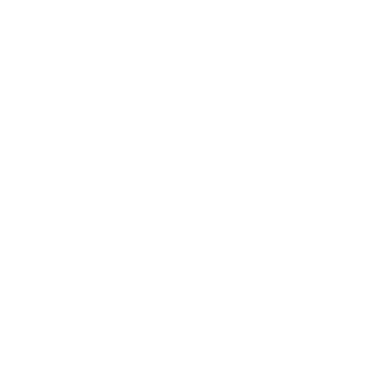

In [12]:
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, _update_graph, 12, interval=500, blit=True)
plt.ion()
plt.show()

<div class="alert alert-info"><h4>Note</h4><p>We use *igraph*'s :meth:`Graph.subgraph()` (see
   :meth:`igraph.GraphBase.induced_subgraph`) in order to obtain a section of
   the ring graph at a time for each frame. While sufficient for an easy
   example, this approach is not very efficient. Thinking of more efficient
   approaches, e.g. vertices with zero radius, is a useful exercise to learn
   the combination of igraph and matplotlib.</p></div>

